# Project
***
## Cian Hogan
## GMIT Data Analytics 2020
## Fundamentals of Data Analysis Module¶

# Project Instructions
***
*Perform and explain simple linear regression using Python on the powerproduction dataset available [HERE](https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv) [1].*

*The goal is to accurately predict wind turbine power output from wind speed values using the data set as a basis.*

## 1. Initial Analysis
***
Before we attempt to perform a linear regression on the data we must first explore the data and it's general characteristics.

We start the analysis by importing the packages we are going to use for the data analysis. Pandas is imported for storing the data in a DataFrame. Numpy is used for it's array computations and advanced computation functions. Matplotlib's pyplot package is imported for data visualisations.

We set the style of the plots used to the Seaborn style and use the matplotlib inline magic command to ensure the plots display within the notebook correctly [2][3].

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('seaborn')
%matplotlib inline
plt.rcParams["figure.figsize"] = [10, 5]

### 1a. Import Data
We import the data using the Panda's function read_csv which takes a filepath or link to a csv file. We provide the url for the power production data and store the data in the variable **powerProduction** [4].

Pandas has some built in functions we can use to get an idea of makeup of the data. **head()** allows us to look at the first five values in the powerProduction while **tails()** shows us the last five values in the data [5][6]. This allows us to easily eyeball the data to see if there are any clear anomalies. 

We can see that in the 10 values shown in the head and tail that each entry has a power output of 0. This could mean that there is an issue with the data so it is important we investigate more to make sure the data is valid.

In [2]:
url = "https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv"

powerProduction = pd.read_csv(url)

In [3]:
print(powerProduction.head(), powerProduction.tail())

   speed  power
0  0.000    0.0
1  0.125    0.0
2  0.150    0.0
3  0.225    0.0
4  0.275    0.0       speed  power
495  24.775    0.0
496  24.850    0.0
497  24.875    0.0
498  24.950    0.0
499  25.000    0.0


Pandas has the function **describe()** which generates descriptive statistics for the given DataFrame. Here it shows us the mean, standard deviation and the interquartile ranges of the data [7]. Unlike above with the head and tail of the data we do have results for power output. This would suggest we do have valid data but that maybe there is something at the very lowest and highest levels of wind speed there seems to be no power output or the output does not get measured.

In [4]:
powerProduction.describe()

,speed,power
count,500.000000,500.000000
mean,12.590398,48.014584
std,7.224991,41.614572
min,0.000000,0.000000
25%,6.324750,5.288000
50%,12.550500,41.645500
75%,18.775250,93.537000
max,25.000000,113.556000


### 1b. Visualising the Data
Next we want to plot the data so we can see the overall shape of the data. We use the pyplot function **scatter()** to generate a scatter plot of the powerProduction data where wind speed is shown on the x-axis and Turbine Power is shown on the y-axis [8].

The below plot shows each entry from the powerProduction as a blue dot. We can see if there is a relationship between wind speed and turbine power by observing any patterns in the plot data.

We can clearly see that in general, there is a relationship between increased wind speed and increased power production. As wind speed increases on the x-axil we do see turbine speed go up on the y-axis. This isn't uniform however, as at the lowest and highest end of the wind speed, less than 8-9 and greater than 17-18, we see a less positive relationship where turbine speed doesn't seem to increase as fast or maybe even decreases.


Text(0.5, 1.0, 'fig.1')

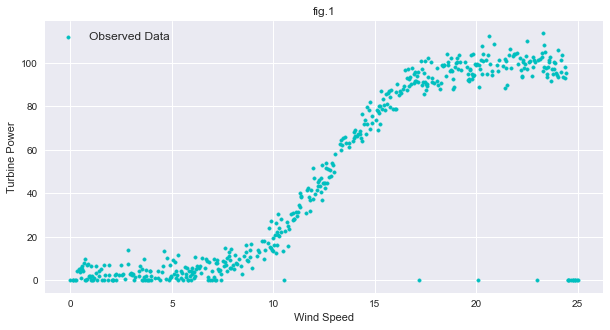

In [5]:
plt.scatter(powerProduction["speed"], powerProduction["power"], marker='.', color="c", label="Observed Data")
plt.xlabel("Wind Speed")
plt.ylabel("Turbine Power")
plt.legend(fontsize="large")
plt.title("fig.1")

## 2. Predicting Values
***
### 2a. Linear Regression
The goal of this project is to attempt to predict turbine power production, dependent variable, based on a given wind speed, independent variable [9]. 

To do this we are going to attempt to fit a straight line equation that best represents the original observations, this process is known as linear regression [10].

A linear regression equation takes the form of `Y = a + bX` where **y** is the predicted value, for a given value **x** and where **a** is the x-axis intercept (value of y when x=0) and **b** is the slope of the line [10].

A linear regression model is best used for data that shows a clear linear relationship between values and is best applied only to the range of the original data [10].

Python has a number of packages available for performing such linear regression such as [scikit-learn](https://scikit-learn.org/stable/), [statsmodels](https://www.statsmodels.org/stable/index.html) and [SciPy](https://www.scipy.org/). For the purposes of this project we will focus on using the [Numpy package](https://numpy.org/) and it's polynomial functions.

### 2b. Linear Polynomials
A polynomial is defined as an expression consisting of variables coefficients, that involves only the operations of addition, subtraction, multiplication, and non-negative integer exponentiation of variables. For example **2x + 1** and **x<sup>2</sup> + 3x - 4** would both be considered polynomial expressions [11].

The Numpy function `polyfit(x, y, deg)` takes two arrays x and y and returns an array of coefficients, with the highest power first, that fit the data using the least squares method to the degree **deg** [12].

For this example we will be fitting our polynomial to the first degree. First degree polynomials are known as linear polynomials because they produce straight line, that are neither vertical or horizontal. A first degree polynomial is expressed as **y = ax +b** [13].

Before we use our polynomial function polyfit we first assign our data to **x** and **y** values below. Our x value is our independent value **speed** and **power** is our dependant y value. The output coefficients will be used to generate predicted values of y for given vales x.

In [6]:
x, y = powerProduction["speed"], powerProduction["power"]

Now we can use numpy.polyfit() to generate our straight line slope and intercept values. We print these values and see that linear expression of the data has a slope `4.917595665404667` and intercept `-13.899902630519604`.

This gives us the linear equation `y = (4.917595665404667*x) - 13.899902630519604`.

In [7]:
slope, intercept = np.polyfit(x, y, 1)
print(slope, intercept)

4.917595665404667 -13.899902630519604


We can plot the linear expression below using our slope and intercept values.

Text(0.5, 1.0, 'fig.2')

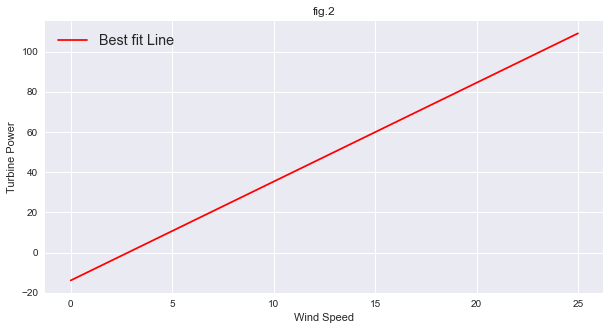

In [8]:
plt.plot(x, (x*slope)+intercept, label="Best fit Line", color="r")
plt.xlabel("Wind Speed")
plt.ylabel("Turbine Power")
plt.legend(fontsize="x-large")
plt.title("fig.2")

For convenience, we can use the numpy method `poly1d()` to convert our polynomial coefficients to a callable object we name **straightLine**.

We can see from our print statement below that the value of straightLine is equal to our linear equation above, rounded to `4.918 x - 13.9`.

In [9]:
straightLine = np.poly1d(np.polyfit(x, y, 1))
print(straightLine)

 
4.918 x - 13.9


We can call our poly1d object straightLine on values of x to predict values of y. Below we call the straightLine on x=5 and x=10 and we see that the outputs are 10.688 and 35.276 respectively

In [10]:
print("x=5, y=", straightLine(5))
print("x=10, y=", straightLine(10))

x=5, y= 10.688075696503732
x=10, y= 35.27605402352707


We can use our straightLine object to plot out linear model similar to how we plotter the equation in fig.2. In fig.3 below we can see the linear model, in red, and how it compares to our original data, in blue.

Text(0.5, 1.0, 'fig.3')

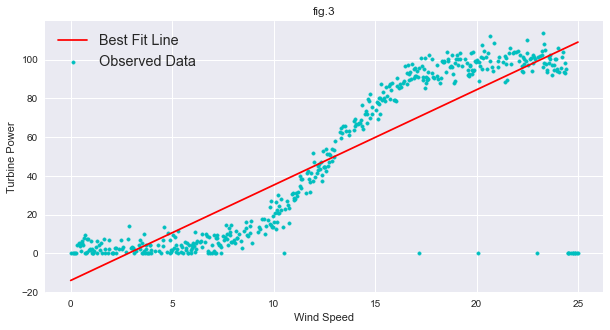

In [11]:
plt.scatter(powerProduction["speed"], powerProduction["power"], marker='.', color="c", label="Observed Data")
plt.plot(x, straightLine(x), color="r", label="Best Fit Line")
plt.xlabel("Wind Speed")
plt.ylabel("Turbine Power")
plt.legend(fontsize="x-large")
plt.title("fig.3")

### 2c. Calculating Cost of Linear Regression

To test our line we need to have a way of quantifying how well our linear models fits our observed data. This is where a cost function becomes important. A cost function is a measure of how wrong a model is in predicting the relationship between two variables [15].

There are a number of cost functions widely used to evaluate linear models. The function we are going to use is the Mean Squared Error (MSE) function. The MSE function calculates the average of the Squared errors between the real values and the predicted values [16].

<img src="https://wikimedia.org/api/rest_v1/media/math/render/svg/e258221518869aa1c6561bb75b99476c4734108e" alt="MSE Function"/>

We define a cost function below that takes the following 3 parameters:

**x**: An array of x values for the given sample. X is the the independent or input variable.
**y**: An array of y values for the given sample. Y is the the dependent or output variable.
**polynomial**: Our polynomial object, generated using polyfit and poly1d.

First we create our prediction array **predict** using our polynomial object on our input array **x**. Next we can calculate the square errors by subtracting our prediction array **predict** from our y array and squaring the values. We store this array in the variable **sqError**. Finally we set our `return` value to the mean of the sqError array using np.mean() [17].

In [12]:
def cost(x: np.ndarray, y: np.ndarray, polynomial):
    predict = polynomial(x)
    sqError = (y - predict)**2
    
    return np.mean(sqError) 

We can use our cost function to generate the result of our Mean Squared Error

In [13]:
print("MSE of linear model:",cost(x, y, straightLine))

MSE of linear model: 468.48232830642434


## 3. Alternatives
***
Is the linear model above the best way to describe the data or can we improve and make more accurate predictions. 

The original data does show a generally positive relationship between the two variables but that relationship is not purely linear. At the lowest and highest wind speeds the power does not increase to the same extent as it does for the middle values, this results in the data having long tails effecting the accuracy of the linear model.

If we look to fig.3 above, we can see that the best fit line doesn't actually fit to the data very well. It over estimates turbine power at lower wind speeds and underestimates power at higher speeds.

### 3a. Second and Third Degree Polynomials.
The **polyfit** method we used to create our linear model allows us to set the degree of fitting polynomial. By selecting 1 degree we generate a linear equation which fit the data. We can use that same function again to try and create a better model for the data.

#### 2nd Degree Polynomial
A second degree polynomial takes the form **y = ax<sup>2</sup> + bx + c**. Second degree polynomials, also known as quadratic polynomials, when plotted produce a curved line of parabola [18].

Again we use our numpy polyfit() function to generate our coefficients but this time we set the degree **deg** to 2 [12]. We pass the coefficients to our poly1d method to generate the polynomial object curvedLine [14]. We can see below that the resulting polynomial expression is **(-0.07022 * x)<sup>2</sup> + (6.674 * x) - 21.23**.

In [14]:
poly2 = np.polyfit(x, y, 2)

curvedLine = np.poly1d(poly2)

print(curvedLine)

          2
-0.07022 x + 6.674 x - 21.23


Below we plot our predicted model **curvedLine** the same way as we plotted our straightLine model in fig.3. To the naked eye it doesn't look like the 2nd degree polynomial fares much better than the linear model did in predicting the values.

Our cost function shows a slight improvement for the curved line with a value of 457.66 which was more than 10 lower than our linear model.

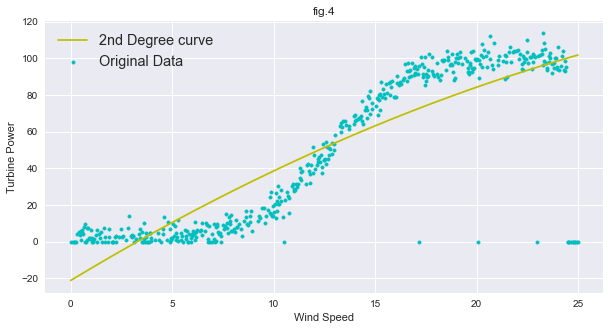

In [15]:
plt.scatter(powerProduction["speed"], powerProduction["power"], marker='.',color="c", label="Original Data")
plt.plot(x, curvedLine(x), color="y", label="2nd Degree curve")
plt.xlabel("Wind Speed")
plt.ylabel("Turbine Power")
plt.title("fig.4")
plt.legend(fontsize="x-large")

In [16]:
print("MSE of curved model:",cost(x,y,curvedLine))

MSE of curved model: 457.66654115317345


#### 3rd Degree Polynomial
We can increase the degree of polynomial again in the hopes of generating a better model. Third Degree Polynomials, also known as cubic polynomials, take the form **y = ax<sup>3</sup> + bx<sup>2</sup> + cx + d** [19].

Again we use polyfit and poly1d to create our polynomial object cubedPoly which represents the function **y = (-0.05242*x)<sup>3</sup> + (1.895*x)<sup>2</sup> - 12.94*x + 19.2**.

In [17]:
poly3d = np.polyfit(x, y, 3)

cubedPoly = np.poly1d(poly3d)

print(cubedPoly)

          3         2
-0.05242 x + 1.895 x - 12.94 x + 19.2


Again we can plot our cubic model and now we can start to see that the predicted values conform much closer to the original data. The general shape our our model  follows both the lower tail effects and the strong positive relationship of the middle values. We can see from below that the cost function has more than halved from even the curved models MSE.

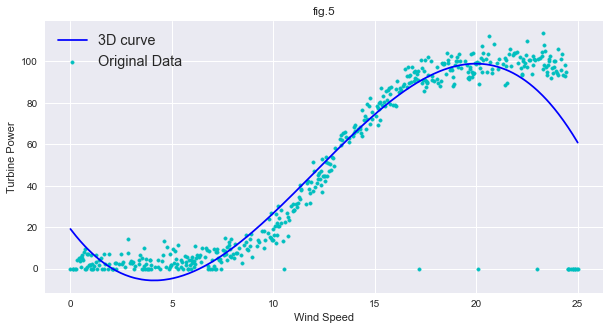

In [18]:
plt.scatter(powerProduction["speed"], powerProduction["power"], marker='.',color="c", label="Original Data")
plt.plot(x, cubedPoly(x), color="b", label="3D curve")
plt.xlabel("Wind Speed")
plt.ylabel("Turbine Power")
plt.title("fig.5")
plt.legend(fontsize="x-large")

In [19]:
print("MSE of curved model:", cost(x,y,cubedPoly))

MSE of curved model: 207.9356389411774


### 3b. Comparing Models
We can compare our three models and see how they perform in the task of predicting the relationship between wind speed and turbine power production.

We can start by plotting all three models and the original data and observing how well they describe the data.

We can clearly see in fig.6 below that while the straight and curved lines show some resemblance to the overall trend of the data they miss the mark on many of the data points.

Our cubed line by far out performs both other models, accounting for both main curves seen in the data. Even our cubed line is still affected by outliers at upper and lower bounds of the data.

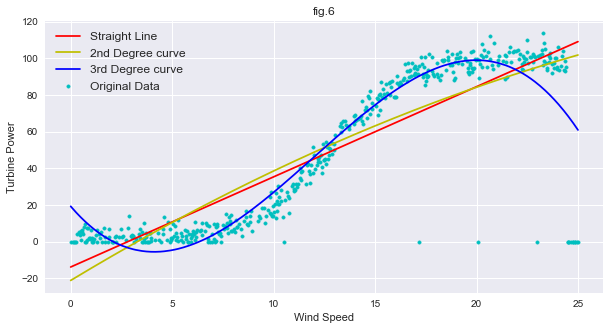

In [20]:
plt.scatter(powerProduction["speed"], powerProduction["power"], marker='.',color="c", label="Original Data")
plt.plot(x, straightLine(x), color="r", label="Straight Line")
plt.plot(x, curvedLine(x), color="y", label="2nd Degree curve")
plt.plot(x, cubedPoly(x), color="b", label="3rd Degree curve")
plt.xlabel("Wind Speed")
plt.ylabel("Turbine Power")
plt.title("fig.6")
plt.legend(fontsize="large")

When we look at the cost of all three models we see that again the cubed line model outperforms both others significantly. There is very little difference between the other 2 models which echoes what we can see in the plot above.

In [21]:
print("Cost of straight-line: ", cost(x,y,straightLine))
print("Cost of curved line: ", cost(x,y,curvedLine))
print("Cost of cubed line: ", cost(x,y,cubedPoly))

Cost of straight-line:  468.48232830642434
Cost of curved line:  457.66654115317345
Cost of cubed line:  207.9356389411774


We can look at how each model predicts output y values for inputs of x to examine the difference between each model. There is a large range on most values with **x=0** and **x=30** being the most extreme of these.

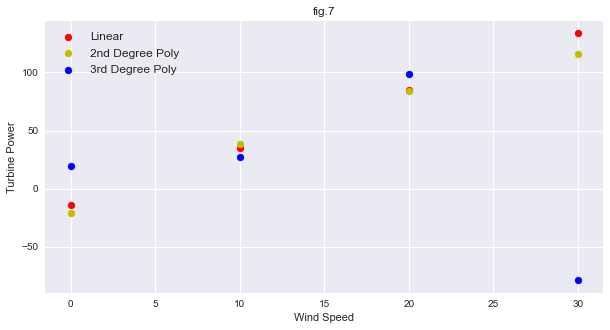

In [22]:
vals = [0,10,20,30]
plt.scatter(vals, straightLine(vals), color="r", label="Linear")
plt.scatter(vals, curvedLine(vals), color="y", label="2nd Degree Poly")
plt.scatter(vals, cubedPoly(vals), color="b", label="3rd Degree Poly")
plt.xlabel("Wind Speed")
plt.ylabel("Turbine Power")
plt.title("fig.7")
plt.legend(fontsize="large")

In [23]:
print("Values for fig.6")
print("-"*25)
for val in vals:
    print(f"x={val}",round(straightLine(val)),round(curvedLine(val)), round(cubedPoly(val)))

Values for fig.6
-------------------------
x=0 -14.0 -21.0 19.0
x=10 35.0 38.0 27.0
x=20 84.0 84.0 99.0
x=30 134.0 116.0 -79.0


## 4. Summary
***
The goal of this project was to perform a simple Linear Regression on the **powerproduction data** to analyse how well it can predict turbine power from a given wind speed. 

#### Performance of Linear Model
The first thing we must note about the data is, that it may not be particularly suitable to applying a linear model to. While in there does seem to be a strong correlation between increase wind speed and increase turbine power we can see in **fig.1** that that correlation does not take the form of a straight line but rather a curve. Curved data is more well suited to non-linear regression analysis [20] 

That curvature impacts the ability of our linear model to accurately predict values. As we can see in **fig.3** our linear model over-estimates values at the lower end of the data and over-estimates values at the upper end. The linear model also does not account for the tapered beginning and ends of the data where increases in wind speed seem to have much less of an effect on the power production.

We quantified the inaccurancy of the linear model using our cost function **Mean Squared Error (MSE)**. This value, **468**, provides a good starting point for how well our predictions perform and allow us to evaluate the performance of the other models available to us.

#### Alternatives to Linear Model
We made two further attempts to improve upon our linear model by using varying degrees of polynomial regression with the help of the numpy packages polynomial functions. Our **second degree polynomial regression** fared only marginally better than our linear model.

Our **third degree polynomial regression** out performed our linear and 2nd degree polynomial considerably. Our cost function produced a MSE of **207.9** which was less than half the cost of both other functions. We can clearly see from **fig.6** that for he majority of data points the 3rd degree polynomial tended to fit visually to the data much more than both other models.

#### Final Thoughts
From the data and our analysis we can make the conclusion that the given turbine data is not well suited to linear regression. Before deciding on a particular model it is best practice to evaluate the data to decide whether a linear model would be appropriate for the characteristics of the data[10]. In this case the data clearly does not follow a simple linear pattern but instead a complex curve.

The linear model can still be useful as a benchmark to measure future models against using standard cost function such as the **MSE** used here. One such model that significantly outperformed the linear model was a Third Degree Polynomial Regression. That model, while improving on the linear, still had it's own limitations. It was significantly impacted by outliers at the lower and upper end of the data range which led to predictions which were inaccurate compared to the real world data.


# References
***

1. Data Source. https://raw.githubusercontent.com/ianmcloughlin/2020A-machstat-project/master/dataset/powerproduction.csv
2. seaborn.pydata.org. seaborn.set_style. https://seaborn.pydata.org/generated/seaborn.set_style.html
3. ipython.readthedocs.io, Built-in magic commands. https://ipython.readthedocs.io/en/stable/interactive/magics.html
4. pandas.pydata.org. pandas.read_csv. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html
5. pandas.pydata.org. pandas.DataFrame.head.  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html
6. pandas.pydata.org. pandas.DataFrame.tail. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html 
7. pandas.pydata.org. pandas.DataFrame.describe. https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html
8. matplotlib.org matplotlib.pyplot.scatter. https://matplotlib.org/3.3.3/api/_as_gen/matplotlib.pyplot.scatter.html
9. Thomas, Lauren (2020). independent and dependent variables. https://www.scribbr.com/methodology/independent-and-dependent-variables
10. stat.yale.edu. Linear Regression. http://www.stat.yale.edu/Courses/1997-98/101/linreg.htm
11. wikipedia. Polynomial. https://en.wikipedia.org/wiki/Polynomial
12. Numpy.org. numpy.polyfit. https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
13. sscc.edu. First Degree Polynomials. https://www.sscc.edu/home/jdavidso/Math/Catalog/Polynomials/First/First.html
14. Numpy.org. numpy.poly1d. https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html#numpy.poly1d
15. McDonald, Conor (2017). Machine learning fundamentals (I): Cost functions and gradient descent. https://towardsdatascience.com/machine-learning-fundamentals-via-linear-regression-41a5d11f5220
16. wikipedia. Mean Squared Error. https://en.wikipedia.org/wiki/Mean_squared_error
17. Numpy.org. numpy.mean https://numpy.org/doc/stable/reference/generated/numpy.mean.html
18. sscc.edu. Second Degree Polynomials. https://www.sscc.edu/home/jdavidso/Math/Catalog/Polynomials/Second/Second.html
19. sscc.edu. Third Degree Polynomials. https://www.sscc.edu/home/jdavidso/Math/Catalog/Polynomials/Third/Third.html
20. statistics.laerd.com. Linear Regression Analysis using SPSS Statistics. https://statistics.laerd.com/spss-tutorials/linear-regression-using-spss-statistics.php